In [ ]:
"""
TO DO 1 - End code/content:
    - IDEA: check whether Miner and Exchange are a majority in 1 of the 8 clusters. If yes, assign label to cluster.
    - Think about project's goal and how i reach it.
    - Recheck and modify make_dataset notebook.
    - Add silhouette or elbow analysis to determine the number of clusters.
    - EDA: better? Add the data_pipeline? Or put data_pipeline in another notebook?
    - main.ipynb with analysis from A to Z?
    - Documentation functions
    - Comments
    - Change code from functions 
    - Pickle results to put dataset on GitHub and dfsummary.to_csv?
    
TO DO 2 - Reorganize the repo
    - Notebooks to delete (in drafts?)
    - Formatting with black
    - Cleaner and more simple structure (check my other repos)
    - README.md - check what I put for other repos
    - Pin the repo on GitHub
    - Functions in another py file?
    
TO DO 3 - Make the Article
    - From copy of main notebook
    - Check the structure (pelican, others,...?)
    - Put beginning at top of article
    - Make article notebook from the beginning with Markdown
    - Live on website + link on GitHub and LinkedIn
    - Add repo or link to repo in "Data Science Portfolio" on GitHub
    - Change portfolio page on GitHub    
    """

In [1]:
import random
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [48]:
dataset = pd.read_csv("../data/processed/labeled_dataset.csv")

In [3]:
dataset.head()

,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,Entity
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,443.735122,587,245377,0,479582,492072,2.437018e+06,5.081546,1.066724e+09,...,314641.354178,1.375943e+08,0,0,35.793619,841.981905,36.758222,91.156553,281,Exchange
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,1031.186386,865,472190,0,392467,312401,5.418637e+06,13.806606,2.131017e+09,...,556867.740550,2.250757e+08,0,0,77.365013,6066.634246,53.006365,469.834039,341,Exchange
2,0x564286362092d8e7936f0549571a803b203aaced,23892.712593,502,109404,0,615240,678,5.823040e+06,9.464664,3.502765e+09,...,537952.716735,3.228961e+08,0,0,39191.246677,60944.567004,43.327104,1286.006034,261,Exchange
3,0x0016eccecffc25b94050187017eb59fa05c029aa,126.407467,54,6180,0,2998,481,4.479533e+03,1.494174,1.205682e+06,...,745.774408,2.516832e+05,0,0,32761.102083,116946.601644,5212.212212,19082.175526,40,NaN
4,0xbe708d227f6dfa0b8f2698bf543b949dfe4e28fb,269.029806,202,1462,0,10164,243,2.077182e+04,2.043666,4.969486e+06,...,38.314152,1.370181e+04,0,0,77338.574380,178129.840874,1845.206238,6596.557607,166,NaN


In [4]:
def data_pipeline(df):
    # Strip address and label columns
    data = df.iloc[:,1:-1]
    log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
    scale = StandardScaler()
    pca =PCA(n_components=data.shape[1])
    
    # Build pipeline
    pipe = Pipeline([('log', log ),
                     ('scale', scale ),
                     ('PCA', pca)])
    results = pipe.fit_transform(data)
    
    return pipe, results

In [5]:
pipe, results = data_pipeline(dataset)

In [116]:
results.shape

(6057, 28)

In [6]:
def cluster(results, n_clusters):
    cl = KMeans(n_clusters, n_init=20, max_iter=500,n_jobs=-1, verbose=0)
    return cl.fit(results)

In [7]:
cl = cluster(results, 8)

In [8]:
def calc_tsne(results, n_components=2, perplexity=20, n_iter=300,verbose=1):
    '''
    Calculated tsne for dataset'''
    time_start = time.time()
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter,verbose=verbose,learning_rate=100)
    tsne_results = tsne.fit_transform(results)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    return tsne_results

In [9]:
tsne_results = calc_tsne(results, perplexity=50,n_iter=2000)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6057 samples in 0.033s...
[t-SNE] Computed neighbors for 6057 samples in 2.605s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6057
[t-SNE] Computed conditional probabilities for sample 2000 / 6057
[t-SNE] Computed conditional probabilities for sample 3000 / 6057
[t-SNE] Computed conditional probabilities for sample 4000 / 6057
[t-SNE] Computed conditional probabilities for sample 5000 / 6057
[t-SNE] Computed conditional probabilities for sample 6000 / 6057
[t-SNE] Computed conditional probabilities for sample 6057 / 6057
[t-SNE] Mean sigma: 0.922569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.448898
[t-SNE] KL divergence after 2000 iterations: 1.759852
t-SNE done! Time elapsed: 96.13287401199341 seconds


Text(0.5, 1.0, 'The Silhouette Method')

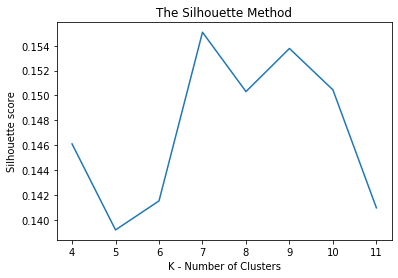

In [118]:
# Add silhouette analysis to know how many clusters?
silhouette_scores = [] 
K = range(4,12) 
    
for k in K:
    clusterer = KMeans(n_clusters=k, n_init=20, max_iter=500)
    preds = clusterer.fit_predict(results)
    score = silhouette_score(results, preds)
    silhouette_scores.append(score)

# Lineplot using silhouette score
plt.plot(K, silhouette_scores) 
plt.xlabel('K - Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('The Silhouette Method') 

In [10]:
def plot_tsne(cl, tsne_results):
    '''
    plot'''
    
    cm = plt.get_cmap('nipy_spectral')

    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111)

    for c in np.unique(cl.labels_):
        mask = cl.labels_==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c
        plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=20, alpha=.4,label=lbl)

    leg = plt.legend(bbox_to_anchor=(1, 1))
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

    plt.title('T-SNE', fontsize=20)
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')
    plt.show()

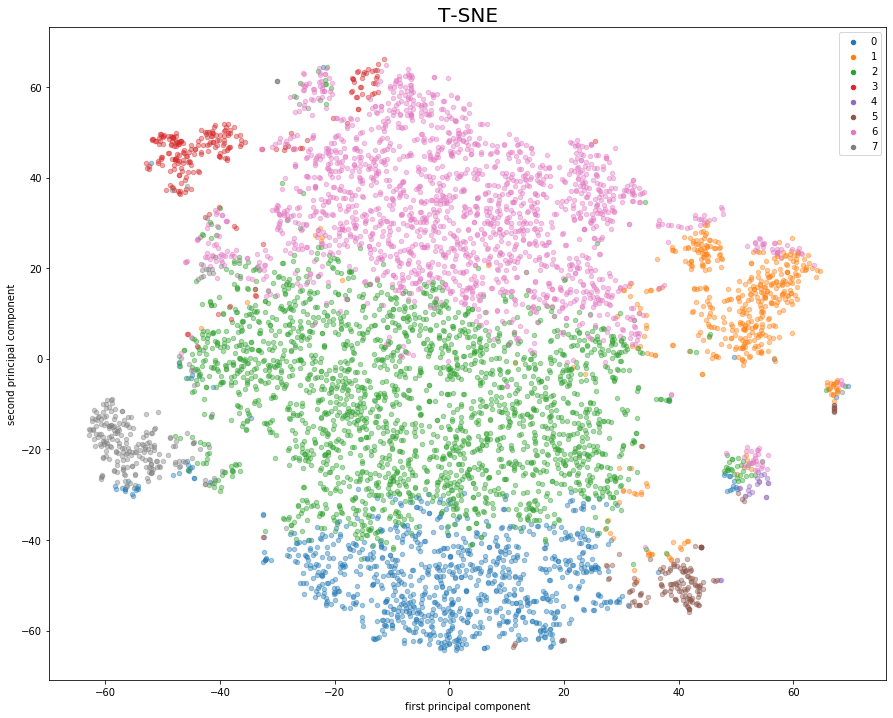

In [11]:
plot_tsne(cl, tsne_results)

In [12]:
def plot_tsne_with_labels(tsne_results,df, dflabel,categs,colors):
    #need to mask df based on which results were kept from the reclustering
    
    labeled_addresses = dflabel["ethereum_address"].values
    labelmask = np.array([addr in labeled_addresses for addr in df["ethereum_address"] ] )
    
    #helper function for category mask
    def cat(addr, labeled_addresses, dflabel):
        if addr not in labeled_addresses:
            return False
        else:
            idx = int(np.where(labeled_addresses==addr)[0][0])
            return dflabel.iloc[idx, 1]

    subset, not_subset  = tsne_results[labelmask] , tsne_results[~labelmask]
    fig = plt.figure(figsize=(15,12))
    #not labelled points
    plt.scatter(not_subset[:,0], not_subset[:,1], s=20, c='gray', alpha=.3)

    #categories
    cats = np.array([cat(addr, labeled_addresses, dflabel) for addr in df["ethereum_address"]]) #[address_mask] ]) #added address mask for all clusters

    for c in list(dflabel["Entity"].unique()):
        mask = dflabel["Entity"]==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c

        #category mask
        catmask = cats == c

        if c in categs:
            idx=categs.index(c)
            color = colors[idx]

            plt.scatter(tsne_results[(labelmask & catmask)][:,0], tsne_results[(labelmask & catmask)][:,1], s=20,c=color, alpha=1,label=lbl)

    leg = plt.legend(bbox_to_anchor=(1, 1))
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

    plt.title('T-SNE', fontsize=20)
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')
    plt.show()

In [24]:
def find_category_of_cluster(cl,dflabel, category="Exchange"):
    #assign cluster number with the most exchanges
    type_cluster = 0
    num_of_type = 0
    lbl_density = 0
    print(category)
    for clust in np.unique(cl.labels_):
        size_of_cluster = np.sum(cl.labels_==clust)
        d = dflabel[dflabel["cluster"]==clust]
        num = np.sum(d["Entity"]==category)
        density = num / size_of_cluster * 100
        if num > num_of_type:
            lbl_density=density
            num_of_type = num
            type_cluster = clust
        print('cluster number   {}   number of type found: {}    cluster size: {}   label density: {}'.format(clust,num,size_of_cluster,density))
    return type_cluster

In [18]:
def assign_cluster_to_data(df, cl):
    df["cluster"] = 10
    for i, row in df.iterrows():
        df.iat[i, 30] = cl.labels_[i]
    return None

In [19]:
assign_cluster_to_data(dataset, cl)

In [21]:
dataset["cluster"].value_counts()

2    2230
6    1794
0     925
1     462
7     244
3     230
5     150
4      22
Name: cluster, dtype: int64

In [25]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining')
colors = ('blue', 'red')

d = {}
for c in categs:
    d[c] = find_category_of_cluster(cl, dataset, category=c)

clusters= list(d.values())

Exchange
cluster number   0   number of type found: 4    cluster size: 925   label density: 0.43243243243243246
cluster number   1   number of type found: 1    cluster size: 462   label density: 0.21645021645021645
cluster number   2   number of type found: 0    cluster size: 2230   label density: 0.0
cluster number   3   number of type found: 0    cluster size: 230   label density: 0.0
cluster number   4   number of type found: 4    cluster size: 22   label density: 18.181818181818183
cluster number   5   number of type found: 44    cluster size: 150   label density: 29.333333333333332
cluster number   6   number of type found: 0    cluster size: 1794   label density: 0.0
cluster number   7   number of type found: 0    cluster size: 244   label density: 0.0
Mining
cluster number   0   number of type found: 2    cluster size: 925   label density: 0.21621621621621623
cluster number   1   number of type found: 24    cluster size: 462   label density: 5.194805194805195
cluster number   2 

In [26]:
dflabel = dataset[dataset["Entity"].notnull()]

In [27]:
dflabel = dflabel[["ethereum_address", "Entity"]]

In [28]:
dflabel

,ethereum_address,Entity
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,Exchange
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,Exchange
2,0x564286362092d8e7936f0549571a803b203aaced,Exchange
6,0x0681d8db095565fe8a346fa0277bffde9c0edbbf,Exchange
7,0x1062a747393198f70f71ec65a582423dba7e5ab3,Exchange
...,...,...
5359,0x29aea5f51879982fdb53fb4f0720823ed77e49dc,Mining
5436,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,Mining
5571,0x005e288d713a5fb3d7c9cf1b43810a98688c7223,Mining
5685,0xf32866d5ce9a9b5673e076be48abcd6ed48ade78,Mining


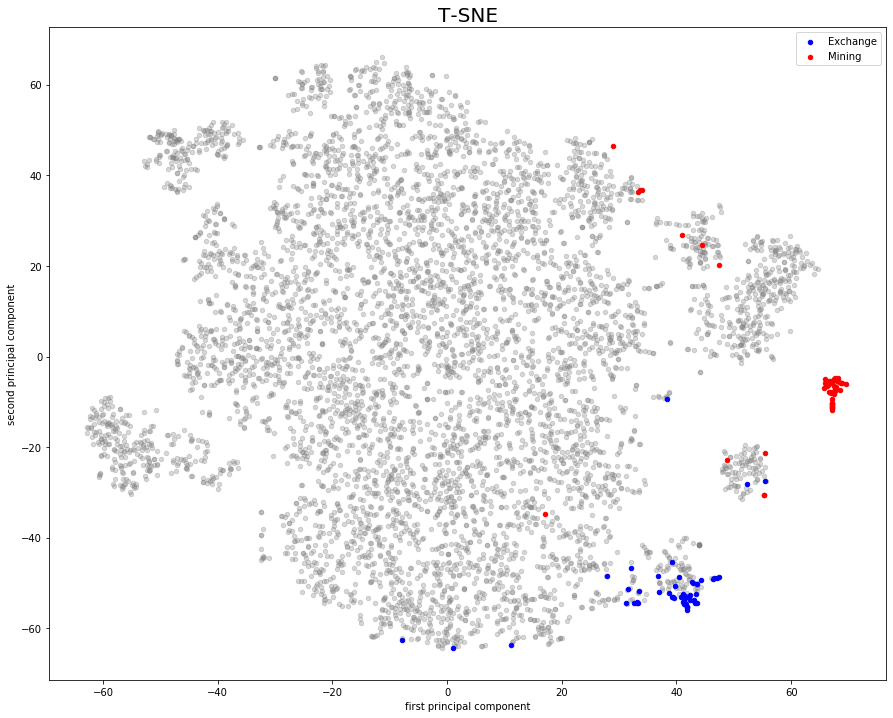

In [29]:
plot_tsne_with_labels(tsne_results, dataset, dflabel, categs, colors)

In [36]:
dataset.drop(["cluster"], axis=1, inplace=True)

In [37]:
data_with_labels = dataset[dataset["Entity"].notnull()]

In [38]:
pipe_2, results_2 = data_pipeline(data_with_labels)

In [42]:
cl_2 = cluster(results_2, 2)

In [43]:
tsne_results_2 = calc_tsne(results_2, perplexity=50,n_iter=2000)

[t-SNE] Computing 103 nearest neighbors...
[t-SNE] Indexed 104 samples in 0.000s...
[t-SNE] Computed neighbors for 104 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 104 / 104
[t-SNE] Mean sigma: 3.871874
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.459686
[t-SNE] KL divergence after 800 iterations: 0.115342
t-SNE done! Time elapsed: 1.5250244140625 seconds


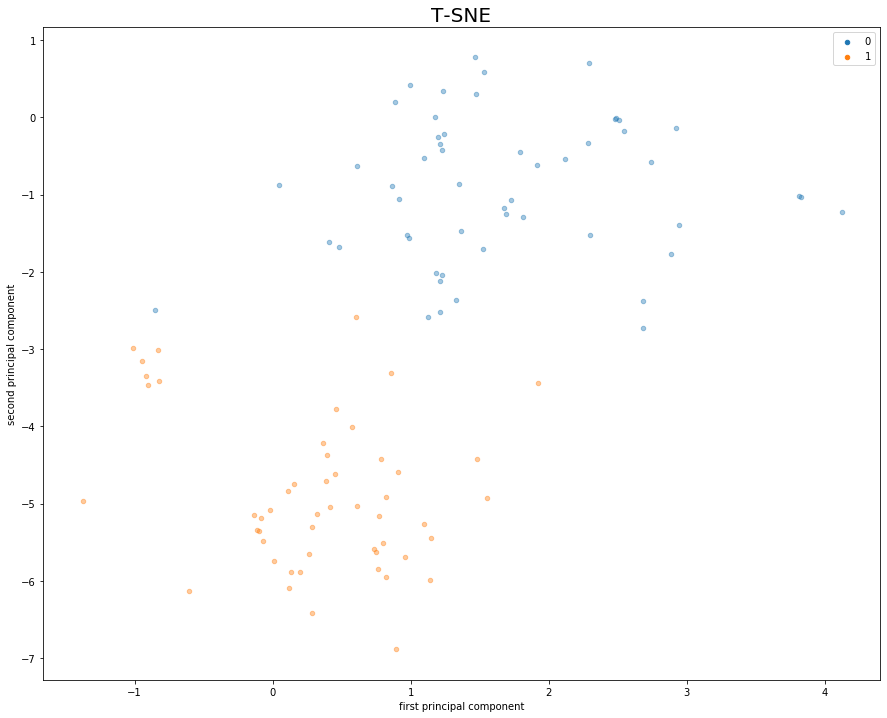

In [44]:
plot_tsne(cl_2, tsne_results_2)

In [49]:
data_mining = dataset[dataset["Entity"] == "Mining"]

In [55]:
data_mining.head()

,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,Entity
115,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,2767.258964,168,35,1167990,9785688,368,3.291571e+06,0.336366,6.850879e+08,...,12.923260,4.825421e+02,0,0,2.770291e+05,5.239230e+05,1.042386e+01,3.837338e+02,82,Mining
187,0x829bd824b016326a401d083b33d092293333a830,7768.269522,121,40,1125443,5984353,4050,1.875938e+06,0.313474,9.406350e+08,...,367.383227,1.293509e+05,43,639507,1.017663e+04,1.277072e+05,7.319252e+00,7.005829e+02,81,Mining
245,0x2fe6f308f9b84dded271d6843214959e4897cdcd,5600.985644,54,2,42,8,6,2.292011e+03,286.501375,1.848914e+05,...,264.513964,3.923998e+03,0,0,4.145275e+06,8.065654e+06,7.176581e+06,1.569637e+07,26,Mining
455,0xea674fdde714fd979de3edf0f56aa9716b898ec8,1063.450229,160,80,2385967,15678630,359,4.634178e+06,0.295573,1.335740e+09,...,2797.628545,1.903793e+06,0,0,2.229556e+05,7.157671e+05,5.319710e+00,3.907858e+01,80,Mining
627,0xc8ab34a1891e416f845a740f0203e2186f8bbd09,1100.150214,46,2,149,8,268,1.007150e+03,125.893750,4.611773e+04,...,56.172760,5.876506e+02,0,0,3.810483e+05,1.093674e+06,6.525946e+06,1.178582e+07,24,Mining


In [59]:
data_exchange = dataset[dataset["Entity"] == "Exchange"]

In [56]:
import itertools
mining_link = list(itertools.combinations(data_mining.index, 2))

In [60]:
exchange_link = list(itertools.combinations(data_exchange.index, 2))

In [62]:
must_link = mining_link + exchange_link

In [63]:
cannot_link = list(itertools.product(data_mining.index, data_exchange.index))

In [ ]:
from copkmeans.cop_kmeans import cop_kmeans

In [66]:
%%bash
git clone https://github.com/Behrouz-Babaki/COP-Kmeans

Cloning into 'COP-Kmeans'...


In [86]:
# %load COP-Kmeans/copkmeans/cop_kmeans.py
import random

def cop_kmeans(dataset, k, ml=[], cl=[],
               initialization='kmpp',
               max_iter=300, tol=1e-4):

    ml, cl = transitive_closure(ml, cl, len(dataset))
    ml_info = get_ml_info(ml, dataset)
    tol = tolerance(tol, dataset)

    centers = initialize_centers(dataset, k, initialization)

    for _ in range(max_iter):
        clusters_ = [-1] * len(dataset)
        for i, d in enumerate(dataset):
            indices, _ = closest_clusters(centers, d)
            counter = 0
            if clusters_[i] == -1:
                found_cluster = False
                while (not found_cluster) and counter < len(indices):
                    index = indices[counter]
                    if not violate_constraints(i, index, clusters_, ml, cl):
                        found_cluster = True
                        clusters_[i] = index
                        for j in ml[i]:
                            clusters_[j] = index
                    counter += 1

                if not found_cluster:
                    return None, None

        clusters_, centers_ = compute_centers(clusters_, dataset, k, ml_info)
        shift = sum(l2_distance(centers[i], centers_[i]) for i in range(k))
        if shift <= tol:
            break

        centers = centers_

    return clusters_, centers_

def l2_distance(point1, point2):
    return sum([(float(i)-float(j))**2 for (i, j) in zip(point1, point2)])

# taken from scikit-learn (https://goo.gl/1RYPP5)
def tolerance(tol, dataset):
    n = len(dataset)
    dim = len(dataset[0])
    averages = [sum(dataset[i][d] for i in range(n))/float(n) for d in range(dim)]
    variances = [sum((dataset[i][d]-averages[d])**2 for i in range(n))/float(n) for d in range(dim)]
    return tol * sum(variances) / dim

def closest_clusters(centers, datapoint):
    distances = [l2_distance(center, datapoint) for
                 center in centers]
    return sorted(range(len(distances)), key=lambda x: distances[x]), distances

def initialize_centers(dataset, k, method):
    if method == 'random':
        ids = list(range(len(dataset)))
        random.shuffle(ids)
        return [dataset[i] for i in ids[:k]]

    elif method == 'kmpp':
        chances = [1] * len(dataset)
        centers = []

        for _ in range(k):
            chances = [x/sum(chances) for x in chances]
            r = random.random()
            acc = 0.0
            for index, chance in enumerate(chances):
                if acc + chance >= r:
                    break
                acc += chance
            centers.append(dataset[index])

            for index, point in enumerate(dataset):
                cids, distances = closest_clusters(centers, point)
                chances[index] = distances[cids[0]]

        return centers

def violate_constraints(data_index, cluster_index, clusters, ml, cl):
    for i in ml[data_index]:
        if clusters[i] != -1 and clusters[i] != cluster_index:
            return True

    for i in cl[data_index]:
        if clusters[i] == cluster_index:
            return True

    return False

def compute_centers(clusters, dataset, k, ml_info):
    cluster_ids = set(clusters)
    k_new = len(cluster_ids)
    id_map = dict(zip(cluster_ids, range(k_new)))
    clusters = [id_map[x] for x in clusters]

    dim = len(dataset[0])
    centers = [[0.0] * dim for i in range(k)]

    counts = [0] * k_new
    for j, c in enumerate(clusters):
        for i in range(dim):
            centers[c][i] += dataset[j][i]
        counts[c] += 1

    for j in range(k_new):
        for i in range(dim):
            centers[j][i] = centers[j][i]/float(counts[j])

    if k_new < k:
        ml_groups, ml_scores, ml_centroids = ml_info
        current_scores = [sum(l2_distance(centers[clusters[i]], dataset[i])
                              for i in group)
                          for group in ml_groups]
        group_ids = sorted(range(len(ml_groups)),
                           key=lambda x: current_scores[x] - ml_scores[x],
                           reverse=True)

        for j in range(k-k_new):
            gid = group_ids[j]
            cid = k_new + j
            centers[cid] = ml_centroids[gid]
            for i in ml_groups[gid]:
                clusters[i] = cid

    return clusters, centers

def get_ml_info(ml, dataset):
    flags = [True] * len(dataset)
    groups = []
    for i in range(len(dataset)):
        if not flags[i]: continue
        group = list(ml[i] | {i})
        groups.append(group)
        for j in group:
            flags[j] = False

    dim = len(dataset[0])
    scores = [0.0] * len(groups)
    centroids = [[0.0] * dim for i in range(len(groups))]

    for j, group in enumerate(groups):
        for d in range(dim):
            for i in group:
                centroids[j][d] += dataset[i][d]
            centroids[j][d] /= float(len(group))

    scores = [sum(l2_distance(centroids[j], dataset[i])
                  for i in groups[j])
              for j in range(len(groups))]

    return groups, scores, centroids

def transitive_closure(ml, cl, n):
    ml_graph = dict()
    cl_graph = dict()
    for i in range(n):
        ml_graph[i] = set()
        cl_graph[i] = set()

    def add_both(d, i, j):
        d[i].add(j)
        d[j].add(i)

    for (i, j) in ml:
        add_both(ml_graph, i, j)

    def dfs(i, graph, visited, component):
        visited[i] = True
        for j in graph[i]:
            if not visited[j]:
                dfs(j, graph, visited, component)
        component.append(i)

    visited = [False] * n
    for i in range(n):
        if not visited[i]:
            component = []
            dfs(i, ml_graph, visited, component)
            for x1 in component:
                for x2 in component:
                    if x1 != x2:
                        ml_graph[x1].add(x2)
    for (i, j) in cl:
        add_both(cl_graph, i, j)
        for y in ml_graph[j]:
            add_both(cl_graph, i, y)
        for x in ml_graph[i]:
            add_both(cl_graph, x, j)
            for y in ml_graph[j]:
                add_both(cl_graph, x, y)

    for i in ml_graph:
        for j in ml_graph[i]:
            if j != i and j in cl_graph[i]:
                raise Exception('inconsistent constraints between %d and %d' %(i, j))

    return ml_graph, cl_graph



In [85]:
data_copkmeans = dataset.iloc[:,1:-1].to_numpy()

In [87]:
clusters, centers = cop_kmeans(dataset=data_copkmeans, k=8, ml=must_link,cl=cannot_link)

In [100]:
def data_pipeline_cop(df):
    # Strip address and label columns
    data = df.iloc[:,1:-1]
    log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
    scale = StandardScaler()
    pca =PCA(n_components=data.shape[1])
    
    # Build pipeline
    pipe = Pipeline([('log', log ),
                     ('scale', scale ),
                     ('PCA', pca)])
    results = pipe.fit_transform(data)
    
    return pipe, results

In [101]:
pipe_cop, results_cop = data_pipeline_cop(dataset)

In [102]:
results_cop

array([[ 1.86591294e+01,  1.52118615e+01,  1.38320412e+00, ...,
        -8.29471514e-03, -1.11780379e-02, -9.55857785e-03],
       [ 1.97244137e+01,  1.34882352e+01,  2.09774757e+00, ...,
         5.33700747e-03, -1.42844131e-02, -3.68812231e-03],
       [ 1.95778758e+01,  6.97610892e+00,  7.84971063e-01, ...,
         5.53212425e-03, -4.66887277e-03,  3.31972771e-03],
       ...,
       [ 1.14232841e+00, -1.02204346e-01, -7.72781688e-01, ...,
        -4.32033594e-03,  4.65111054e-03, -1.14419256e-03],
       [ 8.45452902e-01,  7.62132410e-02,  2.24819329e+00, ...,
         2.97180860e-02,  8.05274996e-03, -7.66829168e-03],
       [ 8.22256606e-01, -3.89639797e-01,  7.39566159e-01, ...,
         4.69668474e-03,  1.76406156e-03,  5.08228535e-04]])

In [103]:
clusters, centers = cop_kmeans(dataset=results_cop, k=8, ml=must_link,cl=cannot_link)

In [104]:
tsne_results_cop = calc_tsne(results_cop, perplexity=50,n_iter=2000)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6057 samples in 0.045s...
[t-SNE] Computed neighbors for 6057 samples in 2.543s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6057
[t-SNE] Computed conditional probabilities for sample 2000 / 6057
[t-SNE] Computed conditional probabilities for sample 3000 / 6057
[t-SNE] Computed conditional probabilities for sample 4000 / 6057
[t-SNE] Computed conditional probabilities for sample 5000 / 6057
[t-SNE] Computed conditional probabilities for sample 6000 / 6057
[t-SNE] Computed conditional probabilities for sample 6057 / 6057
[t-SNE] Mean sigma: 0.922569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.446854
[t-SNE] KL divergence after 2000 iterations: 1.762712
t-SNE done! Time elapsed: 109.5443856716156 seconds


In [94]:
def plot_tsne_cop(clusters, tsne_results):
    '''
    plot'''
    
    cm = plt.get_cmap('nipy_spectral')

    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111)

    for c in np.unique(clusters):
        mask = clusters==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c
        plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=20, alpha=.4,label=lbl)

    leg = plt.legend(bbox_to_anchor=(1, 1))
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

    plt.title('T-SNE', fontsize=20)
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')
    plt.show()

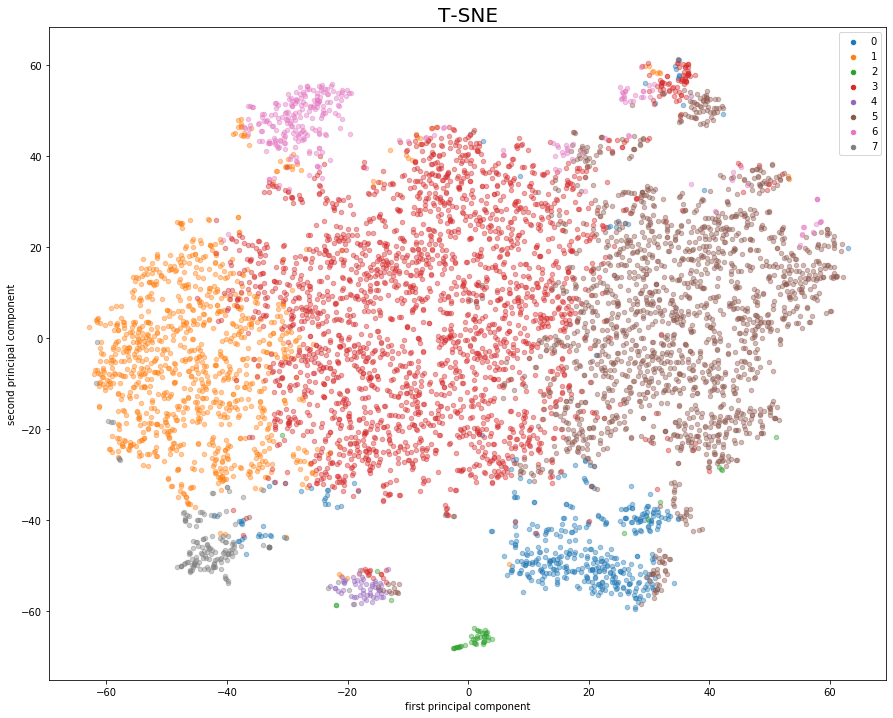

In [105]:
plot_tsne_cop(clusters, tsne_results_cop)

In [106]:
def plot_tsne_with_labels(tsne_results,df, dflabel,categs,colors):
    #need to mask df based on which results were kept from the reclustering
    
    labeled_addresses = dflabel["ethereum_address"].values
    labelmask = np.array([addr in labeled_addresses for addr in df["ethereum_address"] ] )
    
    #helper function for category mask
    def cat(addr, labeled_addresses, dflabel):
        if addr not in labeled_addresses:
            return False
        else:
            idx = int(np.where(labeled_addresses==addr)[0][0])
            return dflabel.iloc[idx, 1]

    subset, not_subset  = tsne_results[labelmask] , tsne_results[~labelmask]
    fig = plt.figure(figsize=(15,12))
    #not labelled points
    plt.scatter(not_subset[:,0], not_subset[:,1], s=20, c='gray', alpha=.3)

    #categories
    cats = np.array([cat(addr, labeled_addresses, dflabel) for addr in df["ethereum_address"]]) #[address_mask] ]) #added address mask for all clusters

    for c in list(dflabel["Entity"].unique()):
        mask = dflabel["Entity"]==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c

        #category mask
        catmask = cats == c

        if c in categs:
            idx=categs.index(c)
            color = colors[idx]

            plt.scatter(tsne_results[(labelmask & catmask)][:,0], tsne_results[(labelmask & catmask)][:,1], s=20,c=color, alpha=1,label=lbl)

    leg = plt.legend(bbox_to_anchor=(1, 1))
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

    plt.title('T-SNE', fontsize=20)
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')
    plt.show()

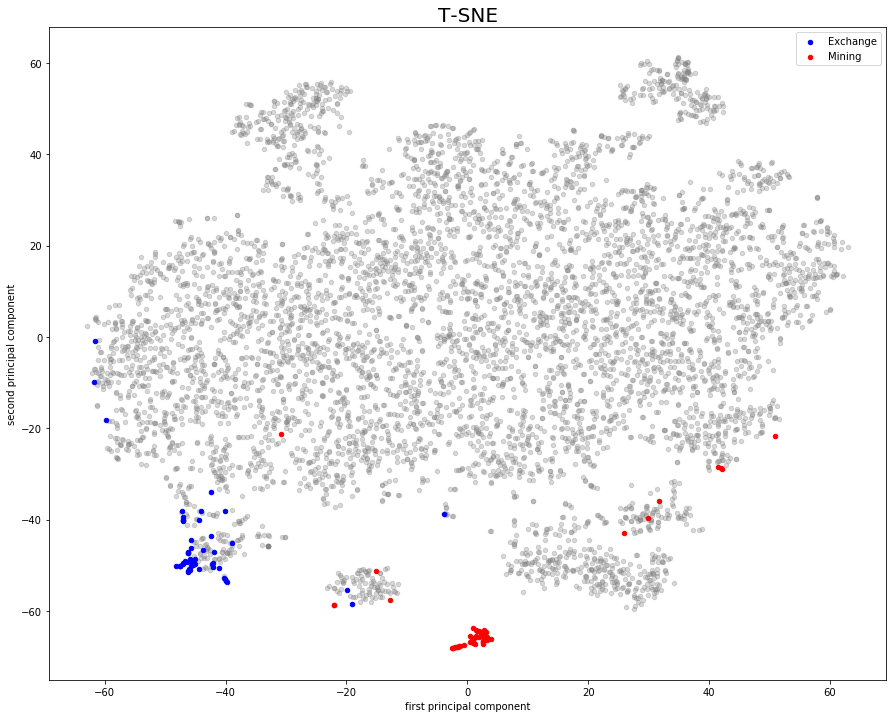

In [107]:
plot_tsne_with_labels(tsne_results_cop, dataset, dflabel, categs, colors)

In [108]:
def assign_cluster_to_data_cop(df, clusters):
    df["cluster"] = 10
    for i, row in df.iterrows():
        df.iat[i, 30] = clusters[i]
    return None

In [109]:
assign_cluster_to_data_cop(dataset, clusters)

In [110]:
def find_category_of_cluster_cop(clusters,dflabel, category="Exchange"):
    #assign cluster number with the most exchanges
    type_cluster = 0
    num_of_type = 0
    lbl_density = 0
    print(category)
    for clust in np.unique(clusters):
        size_of_cluster = np.sum(clusters==clust)
        d = dflabel[dflabel["cluster"]==clust]
        num = np.sum(d["Entity"]==category)
        density = num / size_of_cluster * 100
        if num > num_of_type:
            lbl_density=density
            num_of_type = num
            type_cluster = clust
        print('cluster number   {}   number of type found: {}    cluster size: {}   label density: {}'.format(clust,num,size_of_cluster,density))
    return type_cluster

In [111]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining')
colors = ('blue', 'red')

d = {}
for c in categs:
    d[c] = find_category_of_cluster_cop(clusters, dataset, category=c)

clusters_of_interest = list(d.values())

Exchange
cluster number   0   number of type found: 0    cluster size: 435   label density: 0.0
cluster number   1   number of type found: 0    cluster size: 993   label density: 0.0
cluster number   2   number of type found: 0    cluster size: 51   label density: 0.0
cluster number   3   number of type found: 0    cluster size: 2391   label density: 0.0
cluster number   4   number of type found: 0    cluster size: 56   label density: 0.0
cluster number   5   number of type found: 0    cluster size: 1706   label density: 0.0
cluster number   6   number of type found: 0    cluster size: 278   label density: 0.0
cluster number   7   number of type found: 53    cluster size: 147   label density: 36.054421768707485
Mining
cluster number   0   number of type found: 0    cluster size: 435   label density: 0.0
cluster number   1   number of type found: 0    cluster size: 993   label density: 0.0
cluster number   2   number of type found: 51    cluster size: 51   label density: 100.0
cluster n

In [112]:
dflabel_cop = dataset[dataset["Entity"].notnull()]
dflabel_cop = dflabel[["ethereum_address", "Entity"]]

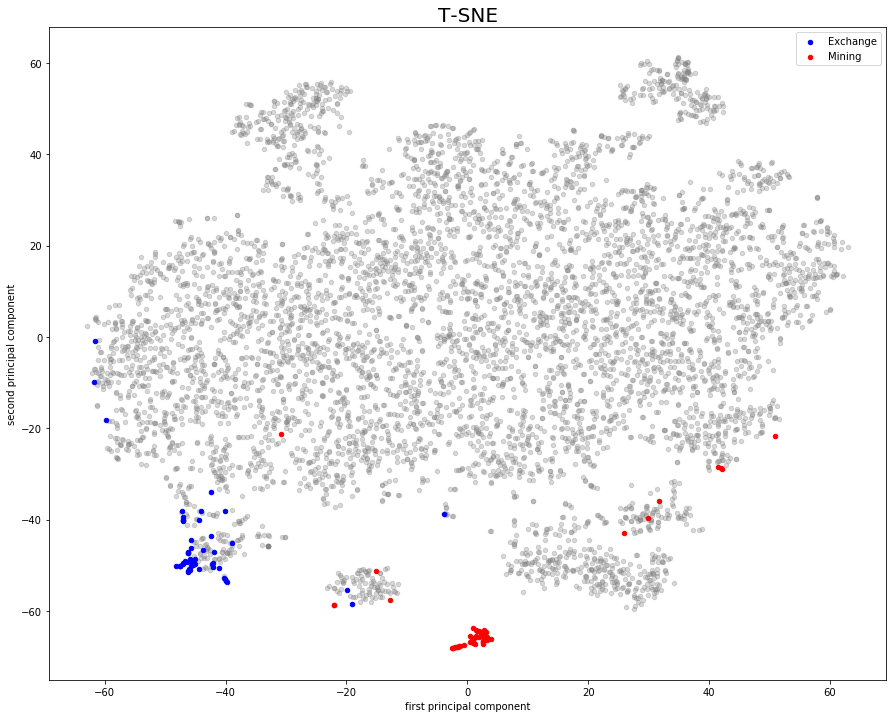

In [113]:
plot_tsne_with_labels(tsne_results_cop, dataset, dflabel_cop, categs, colors)